# Project Title: Uber Request data analysis


**Analyzing Uber Request Data to Optimize Service Reliability and Customer Satisfaction:**
Uber, as a leading ride-hailing service, collects vast amounts of data regarding ride requests, including information about the date, time, location, driver details, and customer behavior. However, challenges persist in maintaining service reliability and ensuring customer satisfaction due to various factors such as ride cancellations, driver availability, and customer experience.


### Project Objective

To Gather, preprocess, analyze and perform Exploratory Data Analysis (EDA) on the Uber request data to identify patterns, trends, ride cancellations,driver alloction predict demand and key factors affecting service reliability, driver availability, and customer satisfaction.

In [76]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
from sklearn.preprocessing import OneHotEncoder


# Data Examination

In [77]:
df = pd.read_csv("UberRequestData.csv", parse_dates=["Request_timestamp"])

df['Request_timestamp'] = pd.to_datetime(df['Request_timestamp'], format='mixed', dayfirst=True)
df['Drop_timestamp'] = pd.to_datetime(df['Drop_timestamp'], format='mixed', dayfirst=True)

#Fillins NaN Values with zero (0)
df = df.fillna(0)
#First 10 row index
df.head(10)

,Request_id,Pickup_point,Driver_id,Status,Request_timestamp,Drop_timestamp
0,619,Airport,1.0,Trip Completed,2023-07-10 11:51:00,2023-07-10 13:00:00
1,867,Airport,1.0,Trip Completed,2023-07-03 17:57:00,2023-07-11 18:47:00
2,1807,City,1.0,Trip Completed,2023-07-12 09:17:00,2023-07-12 09:58:00
3,2532,Airport,1.0,Trip Completed,2023-07-12 21:08:00,2023-07-12 22:03:00
4,3112,City,1.0,Trip Completed,2023-07-13 08:33:00,2023-07-13 09:25:00
5,3879,Airport,1.0,Trip Completed,2023-07-13 21:57:00,2023-07-13 22:28:00
6,4270,Airport,1.0,Trip Completed,2023-07-14 06:15:00,2023-07-14 07:13:00
7,5510,Airport,1.0,Trip Completed,2023-07-15 05:11:00,2023-07-15 06:07:00
8,6248,City,1.0,Trip Completed,2023-07-15 17:57:00,2023-07-15 18:50:00
9,267,City,2.0,Trip Completed,2023-07-11 06:46:00,2023-07-11 07:25:00


In [78]:
#from bottom up
df.tail()

,Request_id,Pickup_point,Driver_id,Status,Request_timestamp,Drop_timestamp
6740,6745,City,0.0,No Cars Available,2023-07-15 23:49:00,0
6741,6752,Airport,0.0,No Cars Available,2023-07-15 23:50:00,0
6742,6751,City,0.0,No Cars Available,2023-07-15 23:52:00,0
6743,6754,City,0.0,No Cars Available,2023-07-15 23:54:00,0
6744,6753,Airport,0.0,No Cars Available,2023-07-15 23:55:00,0


# Data Cleaning

* Splitting the Request_timestamp and Drop_timestamp into, Date, Hour, Day, Day of the week and weekday

In [79]:
#Adding date request hour, drop hour, week day column to the dataset

df['date'] = pd.DatetimeIndex(df['Request_timestamp']).date
df['Request_Hour'] = pd.DatetimeIndex(df['Request_timestamp']).hour
df['Drop_Hour'] = pd.DatetimeIndex(df['Drop_timestamp']).hour
df['Week_Day'] = pd.DatetimeIndex(df['Request_timestamp']).weekday
df['Day'] = pd.DatetimeIndex(df['Request_timestamp']).day
df['Day_Name'] = pd.DatetimeIndex(df['Request_timestamp']).day_name()
df['DropDay_Name'] = pd.DatetimeIndex(df['Drop_timestamp']).day_name()

#changing into categories of day and night
df['Request_day-night'] = pd.cut(x=df['Request_Hour'],
							bins = [0,11,15,19,24],
							labels = ['Morning','Afternoon','Evening','Night'])

df['Drop_day-night'] = pd.cut(x=df['Drop_Hour'],
							bins = [0,11,15,19,24],
							labels = ['Morning','Afternoon','Evening','Night'])							

#Outputting first 12 row index 
df.head(12)


,Request_id,Pickup_point,Driver_id,Status,Request_timestamp,Drop_timestamp,date,Request_Hour,Drop_Hour,Week_Day,Day,Day_Name,DropDay_Name,Request_day-night,Drop_day-night
0,619,Airport,1.0,Trip Completed,2023-07-10 11:51:00,2023-07-10 13:00:00,2023-07-10,11,13,0,10,Monday,Monday,Morning,Afternoon
1,867,Airport,1.0,Trip Completed,2023-07-03 17:57:00,2023-07-11 18:47:00,2023-07-03,17,18,0,3,Monday,Tuesday,Evening,Evening
2,1807,City,1.0,Trip Completed,2023-07-12 09:17:00,2023-07-12 09:58:00,2023-07-12,9,9,2,12,Wednesday,Wednesday,Morning,Morning
3,2532,Airport,1.0,Trip Completed,2023-07-12 21:08:00,2023-07-12 22:03:00,2023-07-12,21,22,2,12,Wednesday,Wednesday,Night,Night
4,3112,City,1.0,Trip Completed,2023-07-13 08:33:00,2023-07-13 09:25:00,2023-07-13,8,9,3,13,Thursday,Thursday,Morning,Morning
5,3879,Airport,1.0,Trip Completed,2023-07-13 21:57:00,2023-07-13 22:28:00,2023-07-13,21,22,3,13,Thursday,Thursday,Night,Night
6,4270,Airport,1.0,Trip Completed,2023-07-14 06:15:00,2023-07-14 07:13:00,2023-07-14,6,7,4,14,Friday,Friday,Morning,Morning
7,5510,Airport,1.0,Trip Completed,2023-07-15 05:11:00,2023-07-15 06:07:00,2023-07-15,5,6,5,15,Saturday,Saturday,Morning,Morning
8,6248,City,1.0,Trip Completed,2023-07-15 17:57:00,2023-07-15 18:50:00,2023-07-15,17,18,5,15,Saturday,Saturday,Evening,Evening
9,267,City,2.0,Trip Completed,2023-07-11 06:46:00,2023-07-11 07:25:00,2023-07-11,6,7,1,11,Tuesday,Tuesday,Morning,Morning


In [80]:
#Checking columns and data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Request_id         6745 non-null   int64         
 1   Pickup_point       6745 non-null   object        
 2   Driver_id          6745 non-null   float64       
 3   Status             6745 non-null   object        
 4   Request_timestamp  6745 non-null   datetime64[ns]
 5   Drop_timestamp     6745 non-null   object        
 6   date               6745 non-null   object        
 7   Request_Hour       6745 non-null   int32         
 8   Drop_Hour          6745 non-null   int32         
 9   Week_Day           6745 non-null   int32         
 10  Day                6745 non-null   int32         
 11  Day_Name           6745 non-null   object        
 12  DropDay_Name       6745 non-null   object        
 13  Request_day-night  6646 non-null   category      
 14  Drop_day

### Examination Output

- The dataset was gotten from kaggle.
- There are 6745 rows and 15 columns.

In [81]:
#Checking dimension of dataset
df.shape

(6745, 15)

In [82]:
#Checking size of dataset
df.size

101175

In [83]:
df.isna().sum()

Request_id              0
Pickup_point            0
Driver_id               0
Status                  0
Request_timestamp       0
Drop_timestamp          0
date                    0
Request_Hour            0
Drop_Hour               0
Week_Day                0
Day                     0
Day_Name                0
DropDay_Name            0
Request_day-night      99
Drop_day-night       4020
dtype: int64

- There is a total of 4119 null values (Drop_day-night=4020, Request_day-night=99).

In [84]:
# Checking NaN value count
df.isna().values.sum()

4119

In [85]:
# Checking Null/Nan value count
df.isnull().values.sum()

4119

In [86]:
# Summary Statistics of datset
df.describe()

,Request_id,Driver_id,Request_timestamp,Request_Hour,Drop_Hour,Week_Day,Day
count,6745.000000,6745.000000,6745,6745.000000,6745.000000,6745.000000,6745.000000
mean,3384.644922,90.764715,2023-07-13 13:34:39.753891840,12.956709,5.405486,3.006375,13.005337
min,1.000000,0.000000,2023-07-03 17:57:00,0.000000,0.000000,0.000000,3.000000
25%,1691.000000,0.000000,2023-07-12 07:51:00,7.000000,0.000000,2.000000,12.000000
50%,3387.000000,53.000000,2023-07-13 14:23:00,13.000000,0.000000,3.000000,13.000000
75%,5080.000000,177.000000,2023-07-14 19:39:00,19.000000,10.000000,4.000000,14.000000
max,6766.000000,300.000000,2023-07-15 23:59:00,23.000000,23.000000,5.000000,15.000000
std,1955.099667,99.132418,NaN,6.504052,7.616844,1.430203,1.434917


In [87]:
df.head()

,Request_id,Pickup_point,Driver_id,Status,Request_timestamp,Drop_timestamp,date,Request_Hour,Drop_Hour,Week_Day,Day,Day_Name,DropDay_Name,Request_day-night,Drop_day-night
0,619,Airport,1.0,Trip Completed,2023-07-10 11:51:00,2023-07-10 13:00:00,2023-07-10,11,13,0,10,Monday,Monday,Morning,Afternoon
1,867,Airport,1.0,Trip Completed,2023-07-03 17:57:00,2023-07-11 18:47:00,2023-07-03,17,18,0,3,Monday,Tuesday,Evening,Evening
2,1807,City,1.0,Trip Completed,2023-07-12 09:17:00,2023-07-12 09:58:00,2023-07-12,9,9,2,12,Wednesday,Wednesday,Morning,Morning
3,2532,Airport,1.0,Trip Completed,2023-07-12 21:08:00,2023-07-12 22:03:00,2023-07-12,21,22,2,12,Wednesday,Wednesday,Night,Night
4,3112,City,1.0,Trip Completed,2023-07-13 08:33:00,2023-07-13 09:25:00,2023-07-13,8,9,3,13,Thursday,Thursday,Morning,Morning


In [88]:
df.tail()

,Request_id,Pickup_point,Driver_id,Status,Request_timestamp,Drop_timestamp,date,Request_Hour,Drop_Hour,Week_Day,Day,Day_Name,DropDay_Name,Request_day-night,Drop_day-night
6740,6745,City,0.0,No Cars Available,2023-07-15 23:49:00,0,2023-07-15,23,0,5,15,Saturday,Thursday,Night,NaN
6741,6752,Airport,0.0,No Cars Available,2023-07-15 23:50:00,0,2023-07-15,23,0,5,15,Saturday,Thursday,Night,NaN
6742,6751,City,0.0,No Cars Available,2023-07-15 23:52:00,0,2023-07-15,23,0,5,15,Saturday,Thursday,Night,NaN
6743,6754,City,0.0,No Cars Available,2023-07-15 23:54:00,0,2023-07-15,23,0,5,15,Saturday,Thursday,Night,NaN
6744,6753,Airport,0.0,No Cars Available,2023-07-15 23:55:00,0,2023-07-15,23,0,5,15,Saturday,Thursday,Night,NaN


## INSIGHTS

### Maximum and Minimum ride request hour

In [89]:
#Checking for the maximum hour rides were requrested accross all days of the week
rH = df['Request_Hour']
rHH = pd.DataFrame(rH.value_counts())
rHH.sort_values(['Request_Hour'], ascending=True)

rHH = rHH.reset_index()
rHH


,Request_Hour,count
0,18,510
1,20,492
2,19,473
3,21,449
4,5,445
5,9,431
6,8,423
7,17,418
8,7,406
9,6,398


In [90]:
rHH.loc[rHH['count'] == max(rHH['count'])]

,Request_Hour,count
0,18,510


### Maximum and Minimum drop time of day-night period

In [91]:
#Checking for the maximum Day-name rides were completed accross all days of the week
rDH = df['Drop_day-night']
rdh = pd.DataFrame(rDH.value_counts())
rdh.sort_values(['Drop_day-night'], ascending=False)

rdh = rdh.reset_index()
rdh

,Drop_day-night,count
0,Morning,1189
1,Night,605
2,Evening,518
3,Afternoon,413


In [92]:
rdh.loc[rdh['count'] == max(rdh['count'])]

,Drop_day-night,count
0,Morning,1189


In [93]:
#Checking for the maximum day-night range rides were requrested accross all days of the week
rDN = df['Request_day-night']
rdn = pd.DataFrame(rDN.value_counts())
rdn.sort_values(['Request_day-night'], ascending=False)
rdn = rdn.reset_index()
rdn


,Request_day-night,count
0,Morning,2996
1,Evening,1560
2,Night,1439
3,Afternoon,651


In [94]:
rdn.loc[rdn['count'] == max(rdn['count'])]

,Request_day-night,count
0,Morning,2996


### Maximum and Minimum weekday ride requests

In [95]:
#Checking for the maximum day of the week rides were requested accross all days of the week
rDD = df['Day_Name']
rdd = pd.DataFrame(rDD.value_counts())
rdd.sort_values(['Day_Name'], ascending=False)
rdd = rdd.reset_index()
rdd

,Day_Name,count
0,Saturday,1381
1,Friday,1352
2,Tuesday,1340
3,Thursday,1337
4,Wednesday,1307
5,Monday,28


In [96]:
rdd.loc[rdd['count'] == max(rdd['count'])]

,Day_Name,count
0,Saturday,1381


### Maximum and Minimum ride completed weekday

In [97]:
#Checking for the maximum day of the week rides were completed accross all days of the week
Group = df.groupby(df.Status)
comp =Group.get_group("Trip Completed")
rDdn = comp['DropDay_Name']
rddn = pd.DataFrame(rDdn.value_counts())
rddn.sort_values(['DropDay_Name'], ascending=False)
rddn = rddn.reset_index()
rddn

,DropDay_Name,count
0,Thursday,569
1,Wednesday,568
2,Tuesday,557
3,Saturday,546
4,Friday,536
5,Sunday,30
6,Monday,25


In [98]:
rddn.loc[rddn['count'] == max(rddn['count'])]

,DropDay_Name,count
0,Thursday,569


### Ride Status Frequency

In [99]:
#Checking for the maximum frequency of ride status 
rS = df['Status']
rSs = pd.DataFrame(rS.value_counts())
rSs.sort_values(['Status'], ascending=True)

rSs = rSs.reset_index()
rSs

,Status,count
0,Trip Completed,2831
1,No Cars Available,2650
2,Cancelled,1264


In [100]:
rSs.loc[rSs['count'] == max(rSs['count'])]

,Status,count
0,Trip Completed,2831


In [101]:
#Data Visualisation
df.head()

,Request_id,Pickup_point,Driver_id,Status,Request_timestamp,Drop_timestamp,date,Request_Hour,Drop_Hour,Week_Day,Day,Day_Name,DropDay_Name,Request_day-night,Drop_day-night
0,619,Airport,1.0,Trip Completed,2023-07-10 11:51:00,2023-07-10 13:00:00,2023-07-10,11,13,0,10,Monday,Monday,Morning,Afternoon
1,867,Airport,1.0,Trip Completed,2023-07-03 17:57:00,2023-07-11 18:47:00,2023-07-03,17,18,0,3,Monday,Tuesday,Evening,Evening
2,1807,City,1.0,Trip Completed,2023-07-12 09:17:00,2023-07-12 09:58:00,2023-07-12,9,9,2,12,Wednesday,Wednesday,Morning,Morning
3,2532,Airport,1.0,Trip Completed,2023-07-12 21:08:00,2023-07-12 22:03:00,2023-07-12,21,22,2,12,Wednesday,Wednesday,Night,Night
4,3112,City,1.0,Trip Completed,2023-07-13 08:33:00,2023-07-13 09:25:00,2023-07-13,8,9,3,13,Thursday,Thursday,Morning,Morning


### Maximum and Minimum Driver frequency

In [102]:


#Checking for the maximum frequency of ride status of drivers
did = df[df.Driver_id>0]
did = did.Driver_id
DID = pd.DataFrame(did.value_counts())
DID.sort_values(['Driver_id'], ascending=False)

DID = DID.reset_index()
DID.head()


,Driver_id,count
0,27.0,22
1,176.0,21
2,177.0,21
3,84.0,21
4,22.0,21


In [103]:
DID.loc[DID['count'] == max(DID['count'])]

,Driver_id,count
0,27.0,22


## Data visualisation

### Univariate Analysis

Text(0, 0.5, 'Driver ID')

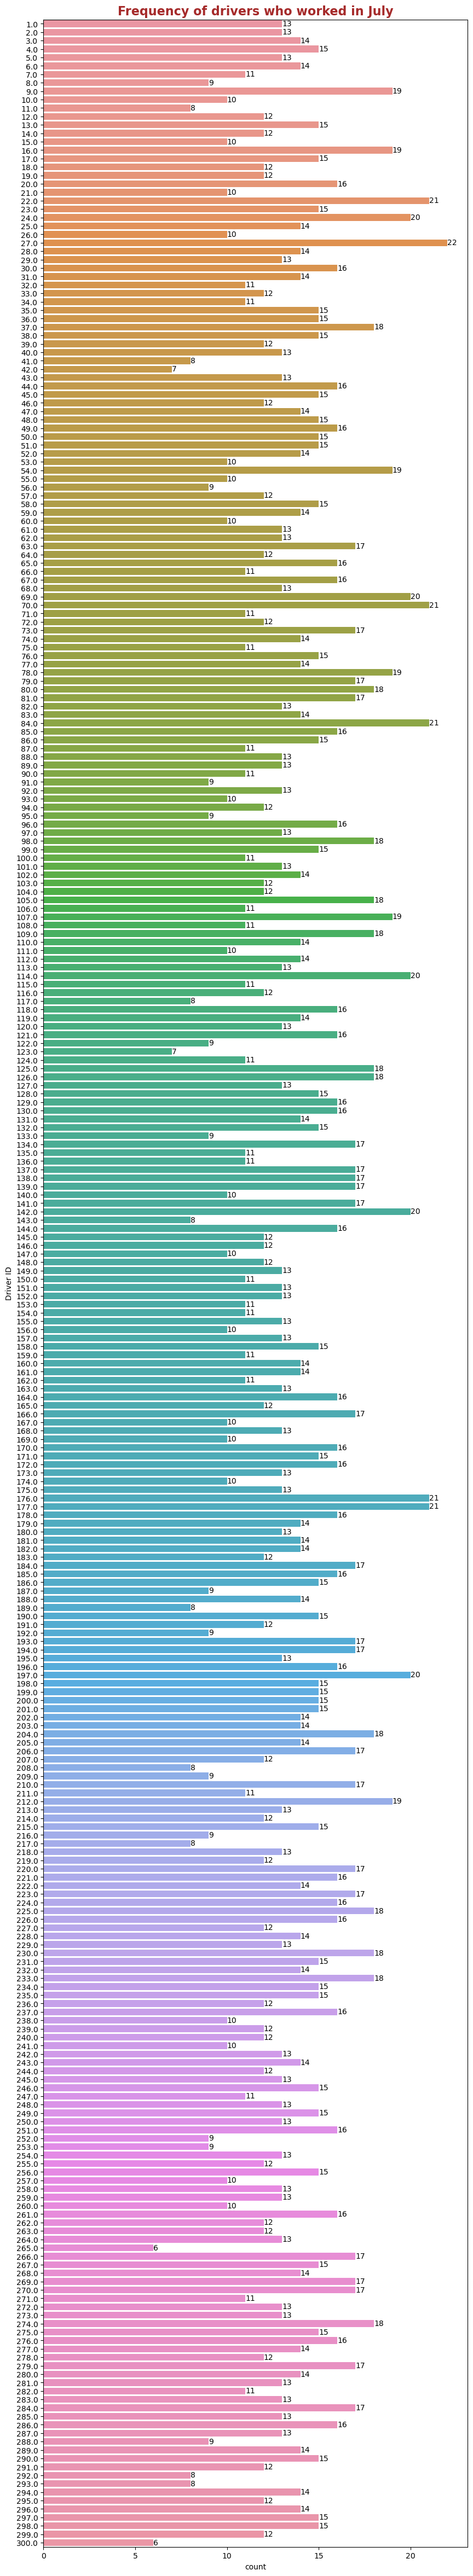

In [104]:
#Visualising driver counts
driverFrame = df[df.Driver_id>0]
plt.figure(figsize=(10,60))
a = sns.countplot(data = driverFrame , y = driverFrame.Driver_id )
a.bar_label(a.containers[0])
plt.title("Frequency of drivers who worked in July", color = 'Brown', weight = 'bold').set_fontsize(16)
plt.ylabel('Driver ID')


 #### Based on the chart, Driver id 27 has the maximum ride count of 22.

In [105]:
df.head()

,Request_id,Pickup_point,Driver_id,Status,Request_timestamp,Drop_timestamp,date,Request_Hour,Drop_Hour,Week_Day,Day,Day_Name,DropDay_Name,Request_day-night,Drop_day-night
0,619,Airport,1.0,Trip Completed,2023-07-10 11:51:00,2023-07-10 13:00:00,2023-07-10,11,13,0,10,Monday,Monday,Morning,Afternoon
1,867,Airport,1.0,Trip Completed,2023-07-03 17:57:00,2023-07-11 18:47:00,2023-07-03,17,18,0,3,Monday,Tuesday,Evening,Evening
2,1807,City,1.0,Trip Completed,2023-07-12 09:17:00,2023-07-12 09:58:00,2023-07-12,9,9,2,12,Wednesday,Wednesday,Morning,Morning
3,2532,Airport,1.0,Trip Completed,2023-07-12 21:08:00,2023-07-12 22:03:00,2023-07-12,21,22,2,12,Wednesday,Wednesday,Night,Night
4,3112,City,1.0,Trip Completed,2023-07-13 08:33:00,2023-07-13 09:25:00,2023-07-13,8,9,3,13,Thursday,Thursday,Morning,Morning


**How many rides were cancelled, completed and unavailable ?**

Text(0.5, 1.0, 'Counts of ride status')

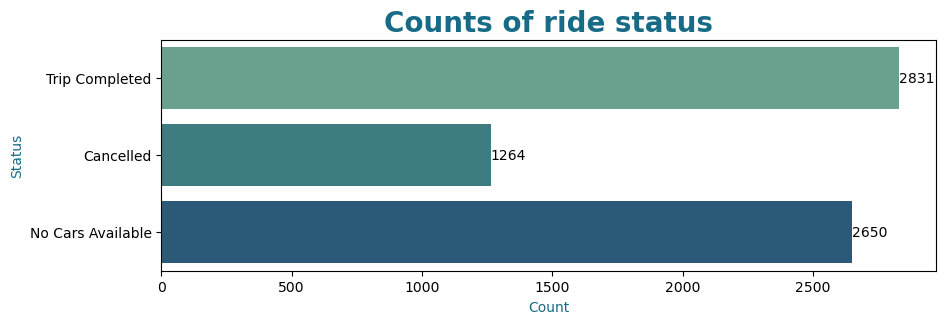

In [106]:
#Plotting the status of rides requested by users
plt.figure(figsize=(10,3))
b = sns.countplot(y = df.Status, palette ='crest')
b.bar_label(b.containers[0])
plt.xlabel('Count', color ="#176B87")
plt.ylabel('Status', color ="#176B87")
plt.title('Counts of ride status', weight ='bold', fontdict={'fontsize': 20}, color ="#176B87")

#### The above visual shows that more trips were completed but the second highest has not cars availabe so more cars will have to be deployed

**Which weekday has a lot of rides and which has less ?**

Text(0.5, 1.0, 'Ride request day frequency')

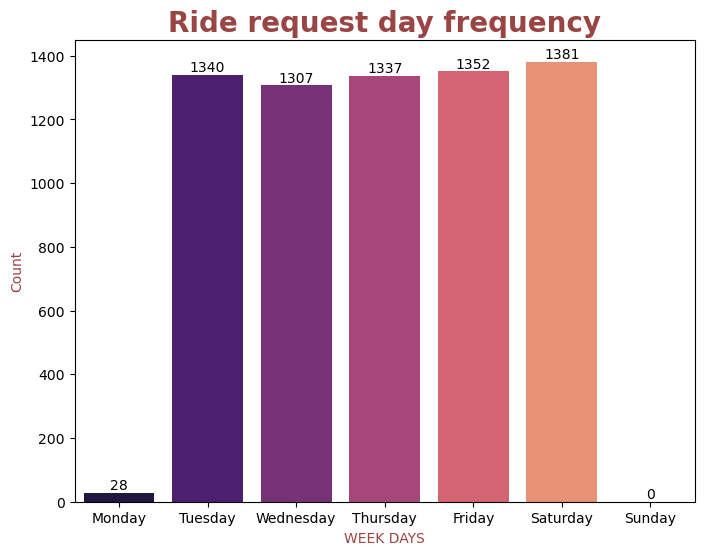

In [107]:
#Plotting request days of rides
plt.figure(figsize=(8,6))
order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday","Sunday"]
c = sns.countplot(data = df, x = df.Day_Name,  palette ='magma', order = order)
c.bar_label(c.containers[0])
plt.xlabel('WEEK DAYS', color ="#9A4444" )
plt.ylabel('Count',color = "#9A4444")
plt.title('Ride request day frequency', weight ='bold', fontdict={'fontsize': 20}, color ="#9A4444")

From the chart, Saturday has the highest rides and monday has least. No work on sundays

In [108]:
#Plotting the days of the week rides were completed
Group = df.groupby(df.Status)
comp =Group.get_group("Trip Completed")

#### Frequency of Days on which rides gets completed

Text(0.5, 1.0, 'Drop day frequency')

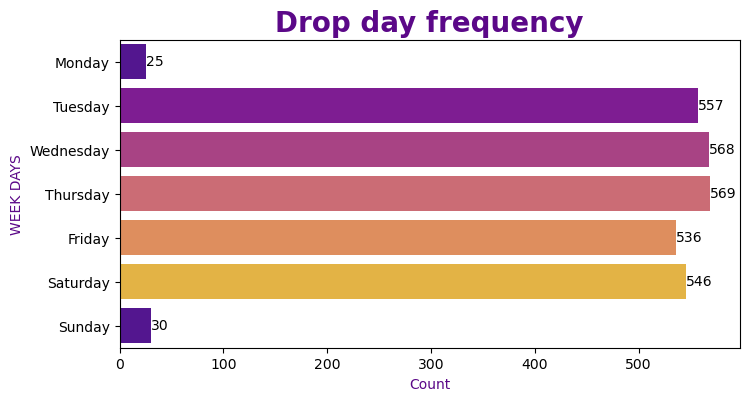

In [109]:
plt.figure(figsize=(8,4))
order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday","Sunday"]
d = sns.countplot(data = comp, y = comp.DropDay_Name, palette= sns.color_palette("plasma"), order = order)
d.bar_label(d.containers[0])
plt.ylabel('WEEK DAYS', color ="#5B0888" )
plt.xlabel('Count',color = "#5B0888")
plt.title('Drop day frequency', weight ='bold', fontdict={'fontsize': 20}, color ="#5B0888")

Thursday appears to top this chart. This also includes rides orded in previous day completed in thursday

**Which hour has the maximum and minimum request ?**

Text(0.5, 1.0, 'Request Hour Chart')

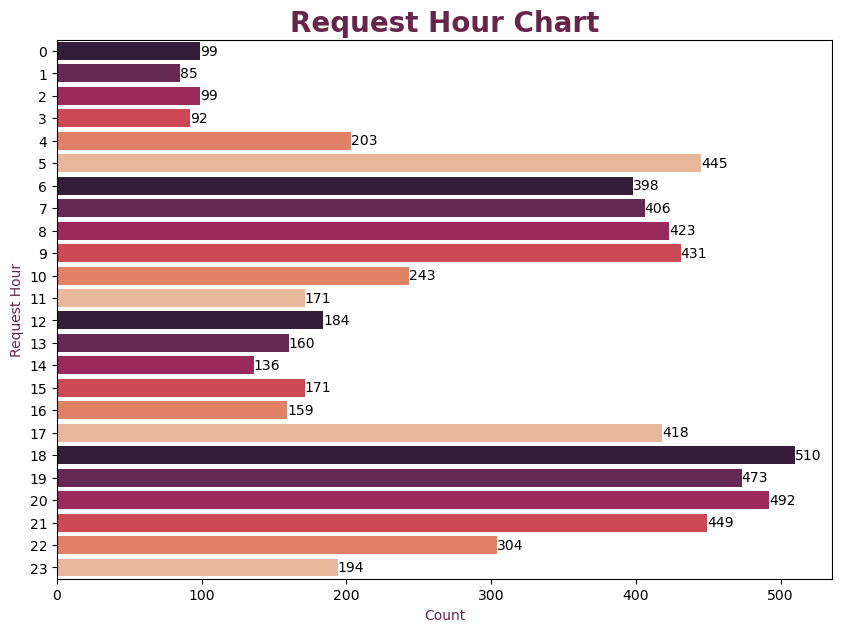

In [110]:
#Plotting the Hours rides were requested
plt.figure(figsize=(10,7))
e = sns.countplot(data = df, y = df.Request_Hour, palette= sns.color_palette("rocket"))
e.bar_label(e.containers[0])
plt.ylabel('Request Hour', color ="#662549" )
plt.xlabel('Count',color = "#662549")
plt.title('Request Hour Chart', weight ='bold', fontdict={'fontsize': 20}, color ="#662549")

From the chart it appears 18th hour has the maximum request of 510 counts

**Which hour has the maximum and minimum completed period ?**

In [111]:
#Plotting the Hours rides were completed
Group = df.groupby(df.Status)
completed =Group.get_group("Trip Completed")
DH = completed['Drop_Hour']
dh = pd.DataFrame(DH.value_counts())
dh.sort_values(['Drop_Hour'])
dh = dh.reset_index()
dh.loc[dh['count']==max(dh['count'])]

,Drop_Hour,count
0,6,190


Text(0.5, 1.0, 'Drop Hour Chart')

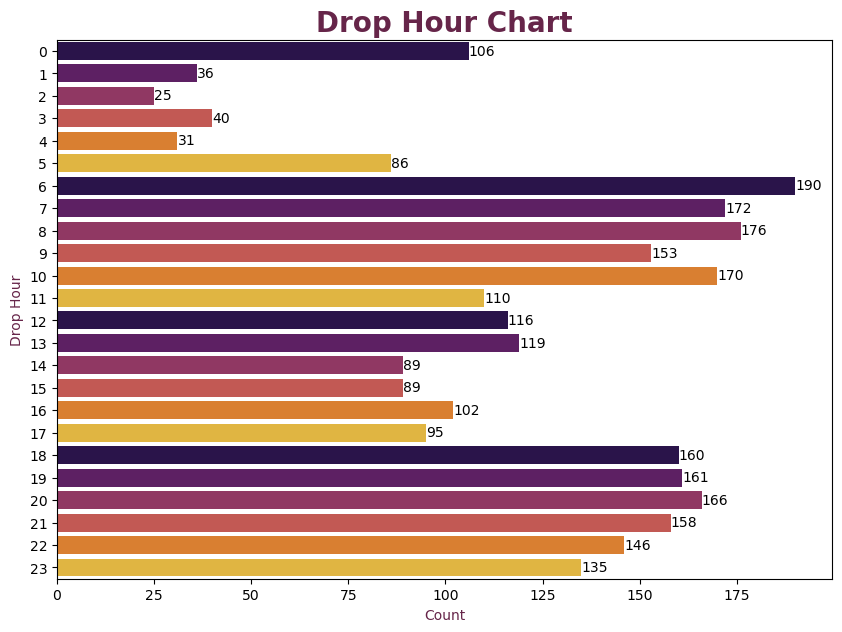

In [112]:
plt.figure(figsize=(10,7))
e = sns.countplot(data = completed, y = completed.Drop_Hour, palette= sns.color_palette("inferno"))
e.bar_label(e.containers[0])
plt.ylabel('Drop Hour', color ="#662549" )
plt.xlabel('Count',color = "#662549")
plt.title('Drop Hour Chart', weight ='bold', fontdict={'fontsize': 20}, color ="#662549")

From the chart it appears the 6th hour has the maximum drop hour of 190 counts

In [113]:
df.head()

,Request_id,Pickup_point,Driver_id,Status,Request_timestamp,Drop_timestamp,date,Request_Hour,Drop_Hour,Week_Day,Day,Day_Name,DropDay_Name,Request_day-night,Drop_day-night
0,619,Airport,1.0,Trip Completed,2023-07-10 11:51:00,2023-07-10 13:00:00,2023-07-10,11,13,0,10,Monday,Monday,Morning,Afternoon
1,867,Airport,1.0,Trip Completed,2023-07-03 17:57:00,2023-07-11 18:47:00,2023-07-03,17,18,0,3,Monday,Tuesday,Evening,Evening
2,1807,City,1.0,Trip Completed,2023-07-12 09:17:00,2023-07-12 09:58:00,2023-07-12,9,9,2,12,Wednesday,Wednesday,Morning,Morning
3,2532,Airport,1.0,Trip Completed,2023-07-12 21:08:00,2023-07-12 22:03:00,2023-07-12,21,22,2,12,Wednesday,Wednesday,Night,Night
4,3112,City,1.0,Trip Completed,2023-07-13 08:33:00,2023-07-13 09:25:00,2023-07-13,8,9,3,13,Thursday,Thursday,Morning,Morning


**Which time of the day has the highest and lowest rides ?**

Text(0.5, 1.0, 'Day-Night requests period')

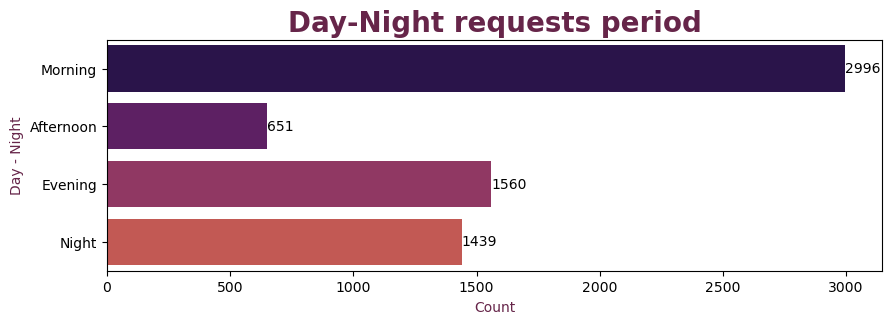

In [114]:
#Plotting time of the day rides were requested
plt.figure(figsize=(10,3))
f = sns.countplot(data = df, y = df['Request_day-night'], palette= sns.color_palette("inferno"))
f.bar_label(f.containers[0])
plt.ylabel('Day - Night', color ="#662549" )
plt.xlabel('Count',color = "#662549")
plt.title('Day-Night requests period', weight ='bold', fontdict={'fontsize': 20}, color ="#662549")

Morning has the highest request period based on the chart

In [115]:
#Plotting time of the day rides were completed
Group = df.groupby(df.Status)
completed =Group.get_group("Trip Completed")
DH = completed['Drop_day-night']
dh = pd.DataFrame(DH.value_counts())
dh.sort_values(['Drop_day-night'])
dh = dh.reset_index()
dh.loc[dh['count']==max(dh['count'])]

,Drop_day-night,count
0,Morning,1189


In [116]:
n = df['Drop_day-night']
n.value_counts()

Drop_day-night
Morning      1189
Night         605
Evening       518
Afternoon     413
Name: count, dtype: int64

**Which time of the day has the highest rides completed ?**

Text(0.5, 1.0, 'Day-Night drop period')

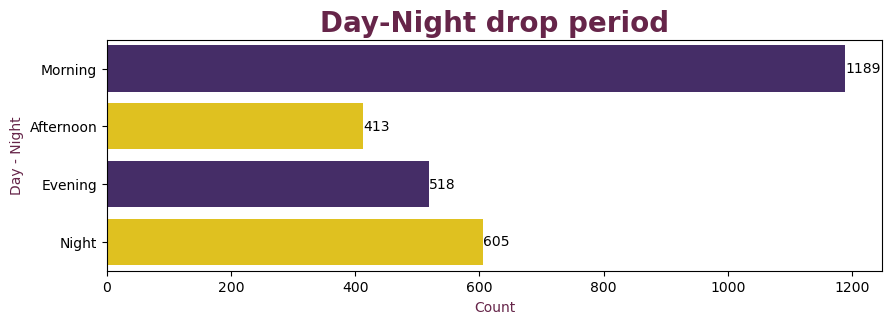

In [117]:
plt.figure(figsize=(10,3))
g = sns.countplot(data = completed, y = completed['Drop_day-night'], palette=['#432371','gold'])  
g.bar_label(g.containers[0])
plt.ylabel('Day - Night', color ="#662549" )
plt.xlabel('Count',color = "#662549")
plt.title('Day-Night drop period', weight ='bold', fontdict={'fontsize': 20}, color ="#662549")

It appears morning has the highest ride completed followed by Night time

**Which has highest frequency between airport and city**

Text(0.5, 1.0, 'Pick up Point frequency')

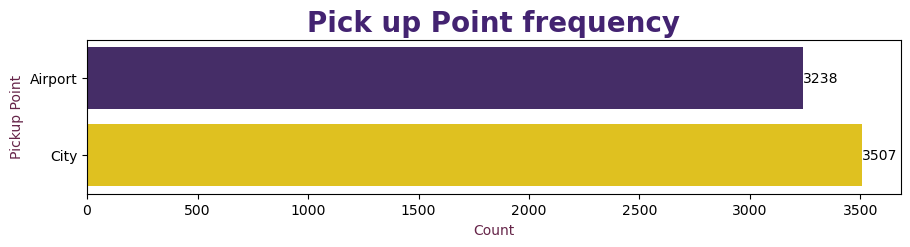

In [118]:
#Plotting city vs airport frequency under pickup point
plt.figure(figsize=(10.5,2))
f = sns.countplot(data = df, y = df['Pickup_point'], palette=['#432371','gold'])
f.bar_label(f.containers[0])
plt.ylabel('Pickup Point', color ="#662549" )
plt.xlabel('Count',color = "#662549")
plt.title('Pick up Point frequency', weight ='bold', fontdict={'fontsize': 20}, color ="#432371")

Rides with the city has the highest pickups compared to the proximity of the airport but since the difference is not too huge this is not much problem

In [119]:
df.head()

,Request_id,Pickup_point,Driver_id,Status,Request_timestamp,Drop_timestamp,date,Request_Hour,Drop_Hour,Week_Day,Day,Day_Name,DropDay_Name,Request_day-night,Drop_day-night
0,619,Airport,1.0,Trip Completed,2023-07-10 11:51:00,2023-07-10 13:00:00,2023-07-10,11,13,0,10,Monday,Monday,Morning,Afternoon
1,867,Airport,1.0,Trip Completed,2023-07-03 17:57:00,2023-07-11 18:47:00,2023-07-03,17,18,0,3,Monday,Tuesday,Evening,Evening
2,1807,City,1.0,Trip Completed,2023-07-12 09:17:00,2023-07-12 09:58:00,2023-07-12,9,9,2,12,Wednesday,Wednesday,Morning,Morning
3,2532,Airport,1.0,Trip Completed,2023-07-12 21:08:00,2023-07-12 22:03:00,2023-07-12,21,22,2,12,Wednesday,Wednesday,Night,Night
4,3112,City,1.0,Trip Completed,2023-07-13 08:33:00,2023-07-13 09:25:00,2023-07-13,8,9,3,13,Thursday,Thursday,Morning,Morning


## Bivariate Analysis


**Which weekday has the highest pick up ?**

Text(0, 0.5, 'Count')

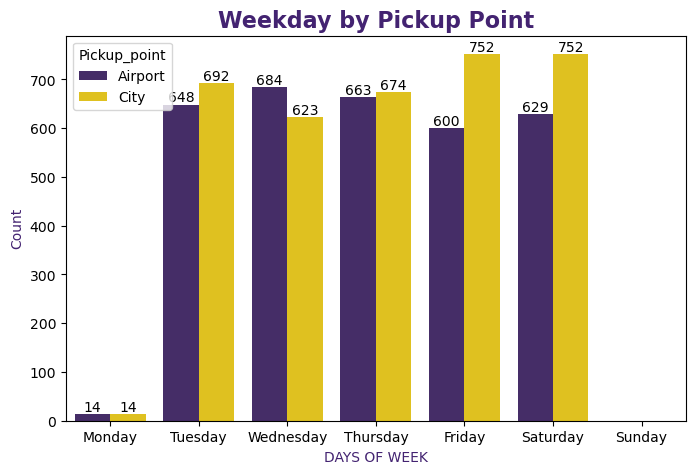

In [120]:
#Bivariate
plt.figure(figsize=(8,5))
#Plot of weekday against Pick-up point
order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday","Sunday"]
h =sns.countplot(x='Day_Name', data=df, hue='Pickup_point', order=order, palette=['#432371','gold'])
plt.title('Weekday by Pickup Point', weight='bold', color = "#432371").set_fontsize('16')
h.bar_label(h.containers[0])
h.bar_label(h.containers[1])
plt.xlabel('DAYS OF WEEK', color = "#432371")
plt.ylabel('Count', color = "#432371")


### Request hour vs Drop hour

Text(0, 0.5, 'Request Hour')

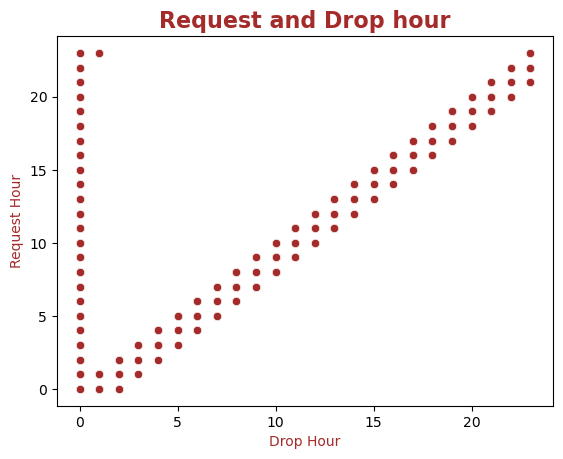

In [121]:
#Plotting Request and drop hours
I =sns.scatterplot(x='Drop_Hour', data=df, y='Request_Hour', color = "brown")
plt.title('Request and Drop hour', weight='bold', color = "Brown").set_fontsize('16')
plt.xlabel('Drop Hour', color = 'Brown')
plt.ylabel('Request Hour', color = 'Brown')

### Week day vs Day of the month

Text(0, 0.5, 'Day')

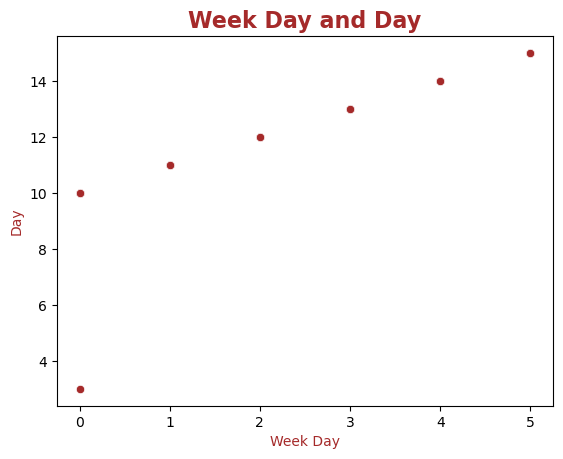

In [122]:
I =sns.scatterplot(x='Week_Day', data=df, y='Day', color = "brown")
plt.title('Week Day and Day', weight='bold', color = 'Brown').set_fontsize('16')
plt.xlabel('Week Day', color = 'Brown')
plt.ylabel('Day', color = 'Brown')

## Multivariate Analysis

In [123]:
#Multivariational
df.head()

,Request_id,Pickup_point,Driver_id,Status,Request_timestamp,Drop_timestamp,date,Request_Hour,Drop_Hour,Week_Day,Day,Day_Name,DropDay_Name,Request_day-night,Drop_day-night
0,619,Airport,1.0,Trip Completed,2023-07-10 11:51:00,2023-07-10 13:00:00,2023-07-10,11,13,0,10,Monday,Monday,Morning,Afternoon
1,867,Airport,1.0,Trip Completed,2023-07-03 17:57:00,2023-07-11 18:47:00,2023-07-03,17,18,0,3,Monday,Tuesday,Evening,Evening
2,1807,City,1.0,Trip Completed,2023-07-12 09:17:00,2023-07-12 09:58:00,2023-07-12,9,9,2,12,Wednesday,Wednesday,Morning,Morning
3,2532,Airport,1.0,Trip Completed,2023-07-12 21:08:00,2023-07-12 22:03:00,2023-07-12,21,22,2,12,Wednesday,Wednesday,Night,Night
4,3112,City,1.0,Trip Completed,2023-07-13 08:33:00,2023-07-13 09:25:00,2023-07-13,8,9,3,13,Thursday,Thursday,Morning,Morning


## **What is the relationship between request hour, drop hour and the day of the week?**

Text(0, 0.5, 'Drop Hour')

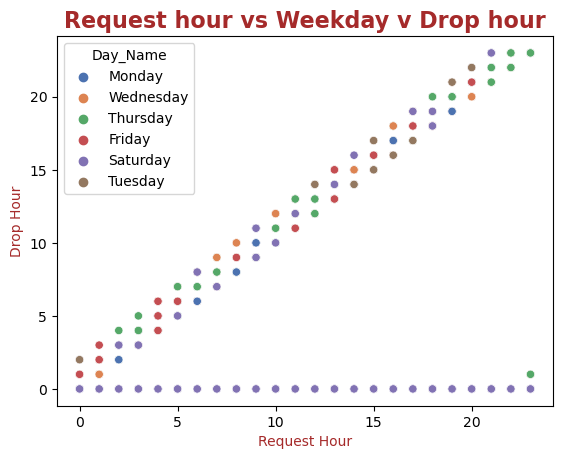

In [124]:
#multivariate analysis cells:" request hour v weekday v drop hour"
sns.scatterplot(x='Request_Hour', y='Drop_Hour',hue='Day_Name',data=df , palette='deep')
plt.title('Request hour vs Weekday v Drop hour', weight='bold', color = 'Brown').set_fontsize('16')
plt.xlabel('Request Hour', color = 'Brown')
plt.ylabel('Drop Hour', color = 'Brown')


Text(0, 0.5, 'Day')

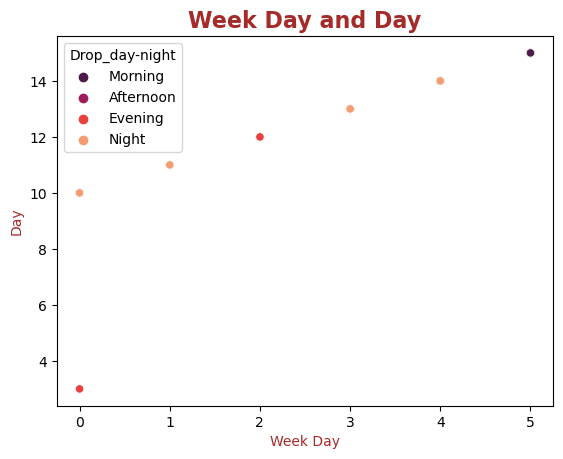

In [125]:
I =sns.scatterplot(x='Week_Day', data=df, y='Day', hue = 'Drop_day-night', palette ="rocket", color = "brown")
plt.title('Week Day and Day', weight='bold', color = 'Brown').set_fontsize('16')
plt.xlabel('Week Day', color = 'Brown')
plt.ylabel('Day', color = 'Brown')

Text(0, 0.5, 'Day')

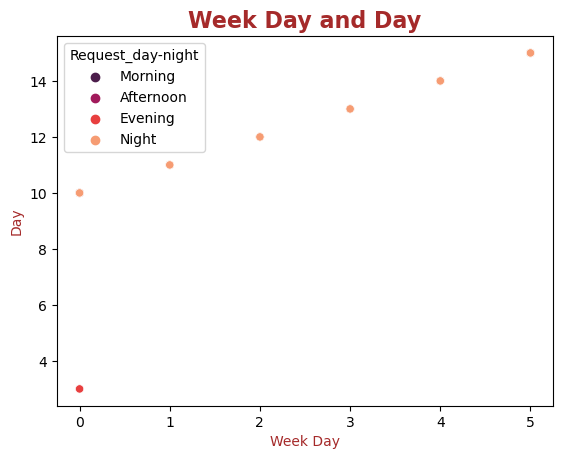

In [126]:
I =sns.scatterplot(x='Week_Day', data=df, y='Day', hue = 'Request_day-night', palette ="rocket", color = "brown")
plt.title('Week Day and Day', weight='bold', color = 'Brown').set_fontsize('16')
plt.xlabel('Week Day', color = 'Brown')
plt.ylabel('Day', color = 'Brown')

Text(0, 0.5, 'Request Hour')

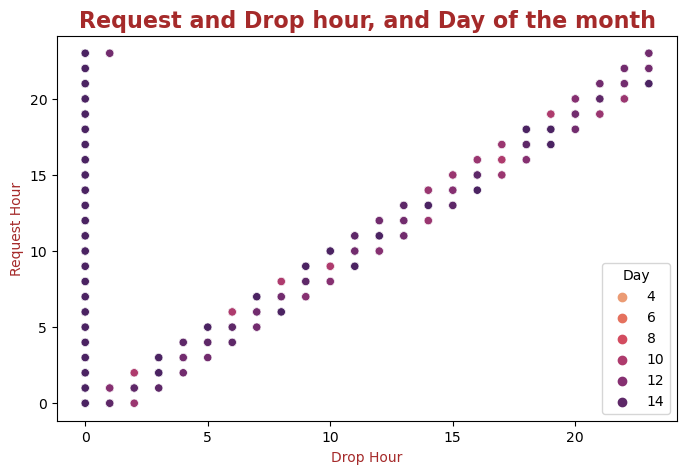

In [127]:
#Plotting Request and drop hours
plt.figure(figsize=(8,5))
I =sns.scatterplot(x='Drop_Hour', data=df, y='Request_Hour',hue='Day', palette ="flare", color = "brown")
plt.title('Request and Drop hour, and Day of the month', weight='bold', color = "Brown").set_fontsize('16')
plt.xlabel('Drop Hour', color = 'Brown')
plt.ylabel('Request Hour', color = 'Brown')

In [128]:
df.head(3)

,Request_id,Pickup_point,Driver_id,Status,Request_timestamp,Drop_timestamp,date,Request_Hour,Drop_Hour,Week_Day,Day,Day_Name,DropDay_Name,Request_day-night,Drop_day-night
0,619,Airport,1.0,Trip Completed,2023-07-10 11:51:00,2023-07-10 13:00:00,2023-07-10,11,13,0,10,Monday,Monday,Morning,Afternoon
1,867,Airport,1.0,Trip Completed,2023-07-03 17:57:00,2023-07-11 18:47:00,2023-07-03,17,18,0,3,Monday,Tuesday,Evening,Evening
2,1807,City,1.0,Trip Completed,2023-07-12 09:17:00,2023-07-12 09:58:00,2023-07-12,9,9,2,12,Wednesday,Wednesday,Morning,Morning


### Correlation

In [129]:
#Correlation
dfn = df
dfn = dfn.drop(['Request_timestamp','Drop_timestamp','date', 'Request_id','Driver_id', 'Week_Day',	'Day','Day_Name',	'DropDay_Name'	], axis = 1)
object_cols = ['Pickup_point', 'Status','Request_day-night','Drop_day-night']
OH_encoder = OneHotEncoder(sparse_output=False)
OH_cols = pd.DataFrame(OH_encoder.fit_transform(dfn[object_cols]))
OH_cols.index = dfn.index
OH_cols.columns = OH_encoder.get_feature_names_out()
dfn_final = dfn.drop(object_cols, axis=1)
dfn = pd.concat([dfn_final, OH_cols], axis=1)
dfn.head()


,Request_Hour,Drop_Hour,Pickup_point_Airport,Pickup_point_City,Status_Cancelled,Status_No Cars Available,Status_Trip Completed,Request_day-night_Afternoon,Request_day-night_Evening,Request_day-night_Morning,Request_day-night_Night,Request_day-night_nan,Drop_day-night_Afternoon,Drop_day-night_Evening,Drop_day-night_Morning,Drop_day-night_Night,Drop_day-night_nan
0,11,13,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,17,18,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,9,9,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,21,22,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,8,9,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [130]:
dfn.corr()

,Request_Hour,Drop_Hour,Pickup_point_Airport,Pickup_point_City,Status_Cancelled,Status_No Cars Available,Status_Trip Completed,Request_day-night_Afternoon,Request_day-night_Evening,Request_day-night_Morning,Request_day-night_Night,Request_day-night_nan,Drop_day-night_Afternoon,Drop_day-night_Evening,Drop_day-night_Morning,Drop_day-night_Night,Drop_day-night_nan
Request_Hour,1.000000,0.252599,0.375764,-0.375764,-0.261377,0.224781,-0.015772,0.024872,0.411135,-0.845024,0.655193,-0.243153,-0.018743,0.175031,-0.450327,0.365561,0.051011
Drop_Hour,0.252599,1.000000,-0.018818,0.018818,-0.340828,-0.570937,0.834512,0.144828,0.101216,-0.242889,0.110072,-0.081928,0.266921,0.466852,0.121165,0.659752,-0.862029
Pickup_point_Airport,0.375764,-0.018818,1.000000,-1.000000,-0.310869,0.267861,-0.019271,-0.034689,0.275255,-0.402095,0.225421,0.013508,-0.013943,-0.005205,-0.024757,0.002663,0.027312
Pickup_point_City,-0.375764,0.018818,-1.000000,1.000000,0.310869,-0.267861,0.019271,0.034689,-0.275255,0.402095,-0.225421,-0.013508,0.013943,0.005205,0.024757,-0.002663,-0.027312
Status_Cancelled,-0.261377,-0.340828,-0.310869,0.310869,1.000000,-0.386313,-0.408416,-0.068184,-0.168801,0.321568,-0.152710,-0.049134,-0.122645,-0.138506,-0.222154,-0.150743,0.395379
Status_No Cars Available,0.224781,-0.570937,0.267861,-0.267861,-0.386313,1.000000,-0.684157,-0.075832,0.194457,-0.257868,0.154603,0.043176,-0.205447,-0.232018,-0.372140,-0.252516,0.662317
Status_Trip Completed,-0.015772,0.834512,-0.019271,0.019271,-0.408416,-0.684157,1.000000,0.128960,-0.058964,0.000921,-0.032247,-0.003877,0.300293,0.339130,0.543939,0.369091,-0.968079
Request_day-night_Afternoon,0.024872,0.144828,-0.034689,0.034689,-0.068184,-0.075832,0.128960,1.000000,-0.179278,-0.292181,-0.170210,-0.039891,0.567789,0.073545,-0.151199,-0.102597,-0.140167
Request_day-night_Evening,0.411135,0.101216,0.275255,-0.275255,-0.168801,0.194457,-0.058964,-0.179278,1.000000,-0.490344,-0.285650,-0.066946,-0.140085,0.408295,-0.253745,0.003783,0.041735
Request_day-night_Morning,-0.845024,-0.242889,-0.402095,0.402095,0.321568,-0.257868,0.000921,-0.292181,-0.490344,1.000000,-0.465543,-0.109106,-0.101363,-0.257833,0.492427,-0.280612,-0.029557


**Correlation plot between Request Hour, Drop Hour, Pickup Point, ride status and day-night request and drop periods**

<Axes: >

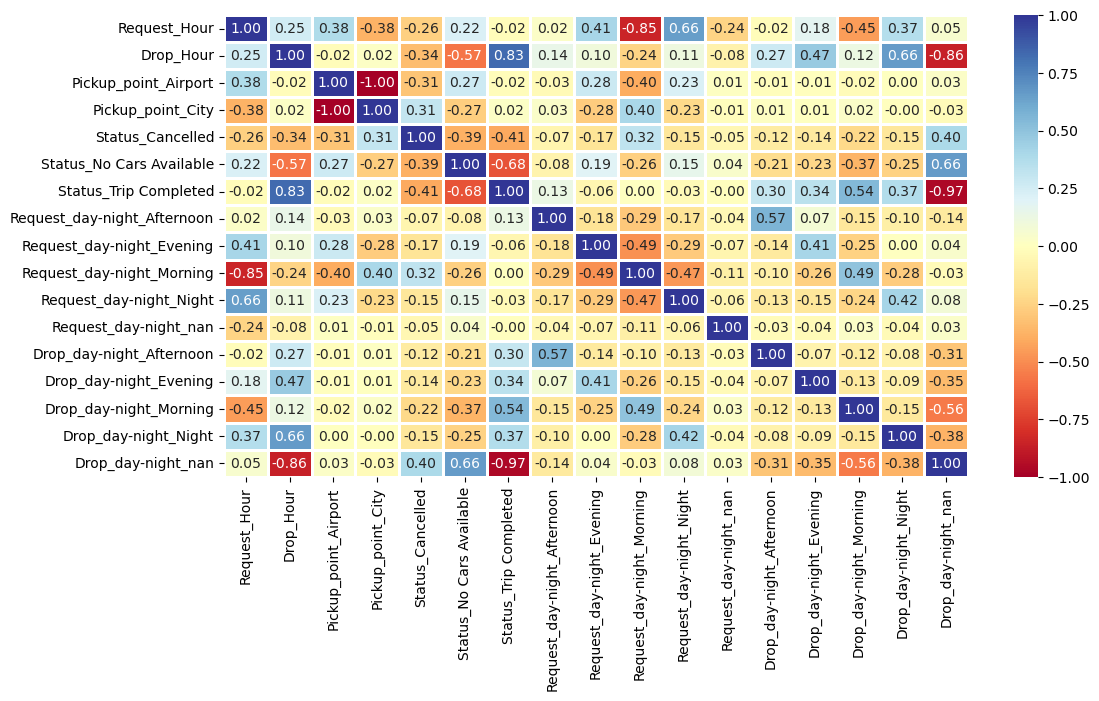

In [131]:
plt.figure(figsize=(12, 6))
sns.heatmap(dfn.corr(), 
			cmap='RdYlBu', 
			fmt='.2f', 
			linewidths=2, 
			annot=True)


The higher the positive number the stronger the positive correlation (deeper blue)
The higher the negative number the Stronger the negative correlation (deeper brown)
The more it approaches zero (0) the less or no correlation.(white blend)

In [132]:
df.head()

,Request_id,Pickup_point,Driver_id,Status,Request_timestamp,Drop_timestamp,date,Request_Hour,Drop_Hour,Week_Day,Day,Day_Name,DropDay_Name,Request_day-night,Drop_day-night
0,619,Airport,1.0,Trip Completed,2023-07-10 11:51:00,2023-07-10 13:00:00,2023-07-10,11,13,0,10,Monday,Monday,Morning,Afternoon
1,867,Airport,1.0,Trip Completed,2023-07-03 17:57:00,2023-07-11 18:47:00,2023-07-03,17,18,0,3,Monday,Tuesday,Evening,Evening
2,1807,City,1.0,Trip Completed,2023-07-12 09:17:00,2023-07-12 09:58:00,2023-07-12,9,9,2,12,Wednesday,Wednesday,Morning,Morning
3,2532,Airport,1.0,Trip Completed,2023-07-12 21:08:00,2023-07-12 22:03:00,2023-07-12,21,22,2,12,Wednesday,Wednesday,Night,Night
4,3112,City,1.0,Trip Completed,2023-07-13 08:33:00,2023-07-13 09:25:00,2023-07-13,8,9,3,13,Thursday,Thursday,Morning,Morning


### Exporting Driver count for machine learning to check clustering of drivers

In [133]:
#DrF =pd.DataFrame(driverFrame)
DrF = driverFrame.Driver_id.value_counts()
DrF = pd.DataFrame(DrF)
DrF.sort_values(by = 'Driver_id', axis=0,  inplace=True)
DrF.reset_index()
DrF.to_csv('Driver_count.csv')
